In [110]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [111]:
data=pd.read_csv("/content/mobile_price_range_data (2).csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [113]:
data= data[data['sc_w'] != 0]
data.shape

(1820, 21)

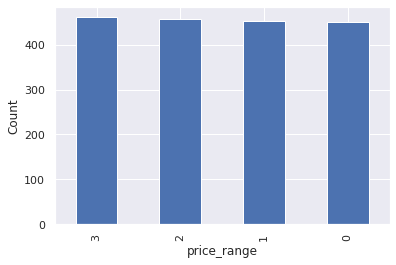

In [114]:
sns.set()
price_plot=data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

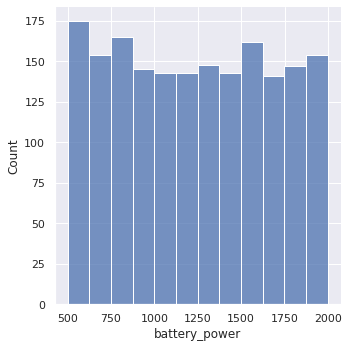

In [115]:
sns.set(rc={'figure.figsize':(5,5)})# Total energy a battery can store in one time measured in mAh

ax=sns.displot(data=data["battery_power"])
plt.show()

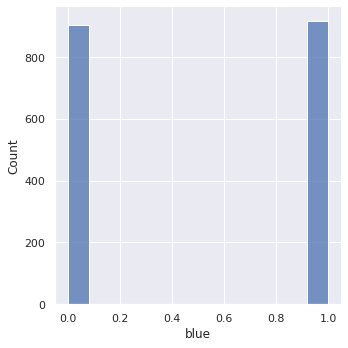

In [116]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=data["blue"])
plt.show()

In the above graph we can see that half the device have bluetooth and half dont.

In [117]:
X=data.drop(['price_range'], axis=1)
y=data['price_range']
#missing values
X.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

RANDOME FOREST CLASSIFICATON

In [119]:
 from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [120]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [121]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)

Random Forest Classifier Accuracy Score:  0.9093406593406593
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



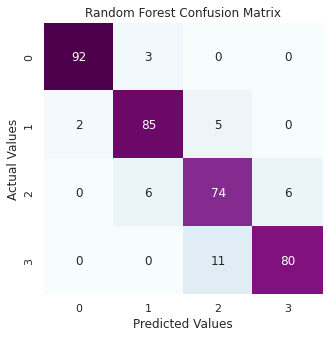

In [122]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

LOGISTIC REGRESSION

In [123]:
x = data.iloc[:,[2,3]].values #two dimensional input data 
y = data.iloc[:,-1].values   #one dimensional output 
x
y

array([1, 2, 2, ..., 3, 0, 3])

In [124]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [125]:
x_train.shape

(1365, 2)

In [126]:
x_test.shape

(455, 2)

In [127]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [128]:
model.fit(x_train,y_train)

LogisticRegression()

In [129]:
y_pred = model.predict(x_test)
y_pred

array([1, 3, 0, 1, 1, 3, 2, 1, 3, 3, 3, 3, 2, 2, 1, 3, 1, 3, 3, 2, 1, 0,
       1, 2, 3, 2, 2, 1, 0, 2, 3, 3, 2, 2, 1, 2, 1, 2, 2, 3, 2, 3, 2, 1,
       1, 1, 1, 1, 3, 3, 2, 2, 3, 2, 3, 3, 2, 1, 0, 2, 2, 1, 3, 2, 1, 1,
       1, 3, 1, 1, 2, 3, 1, 3, 2, 3, 1, 2, 1, 1, 3, 3, 2, 1, 3, 3, 1, 2,
       0, 1, 1, 1, 3, 2, 2, 1, 3, 3, 3, 2, 1, 3, 1, 1, 2, 0, 3, 1, 1, 2,
       3, 1, 3, 3, 3, 1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 2, 2, 1, 2, 1, 2, 3,
       3, 2, 1, 1, 1, 0, 2, 1, 2, 1, 3, 0, 1, 2, 2, 2, 2, 3, 3, 1, 1, 1,
       3, 1, 1, 1, 3, 2, 2, 1, 1, 1, 2, 2, 1, 3, 3, 1, 3, 3, 0, 2, 3, 1,
       1, 3, 2, 1, 3, 3, 0, 1, 1, 1, 3, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 0, 3, 2, 1, 2, 3, 2, 2, 3, 3, 3,
       3, 1, 1, 3, 1, 3, 2, 1, 2, 3, 3, 2, 1, 0, 3, 3, 2, 1, 3, 3, 1, 3,
       3, 3, 2, 1, 3, 2, 3, 3, 1, 2, 1, 1, 1, 1, 3, 3, 2, 0, 1, 3, 3, 2,
       2, 3, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 2, 0, 3, 1, 3, 2,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1,

In [130]:
y_test

array([1, 3, 0, 1, 3, 1, 3, 3, 1, 3, 1, 0, 1, 3, 1, 2, 0, 1, 3, 0, 2, 0,
       3, 1, 1, 2, 2, 0, 3, 1, 0, 0, 3, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1,
       2, 0, 3, 3, 2, 3, 2, 1, 3, 1, 3, 2, 1, 2, 0, 3, 0, 2, 1, 3, 0, 0,
       2, 2, 3, 0, 0, 3, 0, 0, 1, 0, 0, 3, 1, 2, 3, 2, 3, 1, 2, 1, 0, 0,
       0, 0, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 2, 0, 3, 1, 2, 1, 1, 2, 1,
       1, 3, 0, 0, 3, 3, 1, 2, 2, 1, 3, 0, 0, 1, 1, 1, 3, 0, 1, 2, 2, 0,
       0, 2, 1, 1, 3, 3, 1, 3, 2, 2, 3, 2, 0, 2, 1, 0, 2, 3, 0, 1, 1, 0,
       2, 1, 2, 2, 1, 1, 0, 3, 2, 2, 0, 0, 2, 0, 1, 3, 2, 1, 0, 3, 2, 3,
       1, 0, 3, 3, 1, 1, 3, 1, 1, 1, 1, 2, 0, 1, 0, 3, 0, 3, 2, 2, 2, 1,
       3, 3, 2, 3, 3, 0, 0, 1, 1, 1, 2, 2, 2, 0, 3, 1, 1, 3, 1, 3, 0, 2,
       2, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 1, 1, 1, 3, 2, 3, 2, 0, 0,
       1, 0, 3, 0, 3, 1, 1, 2, 3, 3, 1, 3, 2, 1, 3, 0, 1, 1, 1, 2, 3, 0,
       2, 0, 3, 1, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 3, 2, 2, 0, 2, 0, 1,
       3, 2, 3, 1, 0, 1, 1, 0, 3, 3, 3, 2, 1, 1, 0,

In [131]:
import numpy as np
np.unique(y_test,return_counts=True) #actual output 

(array([0, 1, 2, 3]), array([115, 117, 106, 117]))

In [132]:
np.unique(y_pred,return_counts=True) #predicted output 

(array([0, 1, 2, 3]), array([ 19, 166, 118, 152]))

In [133]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.24615384615384617

In [134]:
confusion_matrix(y_test,y_pred)

array([[ 5, 42, 32, 36],
       [ 3, 41, 32, 41],
       [ 7, 38, 26, 35],
       [ 4, 45, 28, 40]])

In [135]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))
 

              precision    recall  f1-score   support

           0       0.26      0.04      0.07       115
           1       0.25      0.35      0.29       117
           2       0.22      0.25      0.23       106
           3       0.26      0.34      0.30       117

    accuracy                           0.25       455
   macro avg       0.25      0.25      0.22       455
weighted avg       0.25      0.25      0.22       455



KNN CLASSIFICATION

In [136]:
 from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [137]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [138]:
y_pred = model.predict(x)
y_pred

array([1, 2, 2, ..., 3, 0, 2])

In [139]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(y,y_pred)

0.2692307692307692

In [140]:
confusion_matrix(y,y_pred)

array([[117,  81, 134, 119],
       [119,  92, 118, 123],
       [111,  85, 153, 107],
       [104,  93, 136, 128]])

In [141]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.26      0.26      0.26       451
           1       0.26      0.20      0.23       452
           2       0.28      0.34      0.31       456
           3       0.27      0.28      0.27       461

    accuracy                           0.27      1820
   macro avg       0.27      0.27      0.27      1820
weighted avg       0.27      0.27      0.27      1820



In [142]:
from sklearn.svm import SVC 
classifier_svm=SVC(kernel="rbf",random_state=0)

In [143]:
 classifier_svm.fit(x_train,y_train)

SVC(random_state=0)

In [144]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [145]:
y_pred=classifier_svm.predict(x_test)

In [146]:
print(accuracy_score(y_test,y_pred))

0.24175824175824176


In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.38      0.31       115
           1       0.21      0.20      0.20       117
           2       0.19      0.09      0.13       106
           3       0.28      0.28      0.28       117

    accuracy                           0.24       455
   macro avg       0.23      0.24      0.23       455
weighted avg       0.23      0.24      0.23       455



In [148]:
confusion_matrix(y_test,y_pred)

array([[44, 32, 11, 28],
       [47, 23, 19, 28],
       [44, 22, 10, 30],
       [38, 33, 13, 33]])

In [149]:
from sklearn.tree import DecisionTreeClassifier
 

In [150]:
clf=DecisionTreeClassifier()

In [151]:
clf=clf.fit(x_train,y_train)

In [152]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [153]:
y_pred=clf.predict(x_test)

In [154]:
 print(accuracy_score(y_test,y_pred))

0.2703296703296703


In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.28      0.27       115
           1       0.29      0.12      0.17       117
           2       0.27      0.25      0.26       106
           3       0.28      0.43      0.34       117

    accuracy                           0.27       455
   macro avg       0.27      0.27      0.26       455
weighted avg       0.27      0.27      0.26       455



In [156]:
confusion_matrix(y_test,y_pred)

array([[32, 10, 20, 53],
       [34, 14, 31, 38],
       [33,  7, 27, 39],
       [27, 18, 22, 50]])

Higher accuracy is given by SVM classifier with linear kernel